In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots


from functools import partial
import scipy.stats as stats
import itertools
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
score=pd.read_csv("CaseStudy1New.csv")
score

,Unnamed: 0,Subject_ID,Group,HHI_Score,GAD,PHQ,ISI,SWLS,Hyperacusis,CFQ,Gender,Age,Duration_of_tinnitus.years.,Pre_TFI_Score,Post_TFI_Score
0,1,1072kznm,Treatment,0,11,8,15,15,14,34,1,48,5.0,69.6,16.0
1,2,1079fhqk,Treatment,10,6,2,2,30,14,25,2,56,20.0,32.8,NaN
2,3,1082cqpz,Treatment,40,16,19,24,9,29,30,1,30,0.4,82.0,77.2
3,4,1083dgzs,Treatment,12,5,2,3,13,17,45,1,45,3.0,52.0,12.8
4,5,1085rnwz,Treatment,16,8,7,8,32,27,53,2,62,3.0,58.4,38.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,138,1280nqpk,Control,28,10,16,6,23,20,50,2,24,0.4,78.4,71.2
138,139,1288dhwh,Control,28,6,3,2,20,17,65,1,68,3.0,53.2,82.5
139,140,1290twvl,Control,14,14,15,14,12,21,49,2,44,2.0,76.4,57.1
140,141,1295kjwj,Control,22,0,4,16,29,15,33,2,48,54.0,63.6,NaN


In [ ]:
score.shape

(142, 15)

In [ ]:
score.head()

,Unnamed: 0,Subject_ID,Group,HHI_Score,GAD,PHQ,ISI,SWLS,Hyperacusis,CFQ,Gender,Age,Duration_of_tinnitus.years.,Pre_TFI_Score,Post_TFI_Score
0,1,1072kznm,Treatment,0,11,8,15,15,14,34,1,48,5.0,69.6,16.0
1,2,1079fhqk,Treatment,10,6,2,2,30,14,25,2,56,20.0,32.8,NaN
2,3,1082cqpz,Treatment,40,16,19,24,9,29,30,1,30,0.4,82.0,77.2
3,4,1083dgzs,Treatment,12,5,2,3,13,17,45,1,45,3.0,52.0,12.8
4,5,1085rnwz,Treatment,16,8,7,8,32,27,53,2,62,3.0,58.4,38.4


In [ ]:
score.describe()

,Unnamed: 0,HHI_Score,GAD,PHQ,ISI,SWLS,Hyperacusis,CFQ,Gender,Age,Duration_of_tinnitus.years.,Pre_TFI_Score,Post_TFI_Score
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,125.000000
mean,71.500000,17.788732,7.478873,8.028169,12.957746,20.316901,19.042254,40.591549,1.436620,55.450704,11.990845,59.374648,50.516800
std,41.135953,11.370505,5.583306,5.670558,7.041793,7.356543,8.496034,15.962347,0.497722,12.883316,12.503627,18.251169,21.876957
min,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,7.000000,1.000000,22.000000,0.300000,24.400000,4.000000
25%,36.250000,8.000000,3.000000,4.000000,8.000000,14.000000,13.000000,29.250000,1.000000,46.250000,3.000000,46.800000,32.000000
50%,71.500000,18.000000,6.000000,7.000000,13.000000,20.000000,18.500000,41.000000,1.000000,58.000000,10.000000,58.600000,57.100000
75%,106.750000,26.000000,11.000000,11.000000,18.000000,26.000000,25.000000,50.000000,2.000000,65.000000,15.000000,73.600000,66.000000
max,142.000000,40.000000,21.000000,27.000000,27.000000,35.000000,42.000000,86.000000,2.000000,83.000000,55.000000,97.200000,88.400000


In [ ]:
score.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
score.drop('Subject_ID', axis=1, inplace=True)

In [ ]:
#score.drop('Group', axis=1, inplace=True)

In [ ]:
#score.drop('Gender', axis=1, inplace=True)

In [ ]:
score.head()

,Group,HHI_Score,GAD,PHQ,ISI,SWLS,Hyperacusis,CFQ,Gender,Age,Duration_of_tinnitus.years.,Pre_TFI_Score,Post_TFI_Score
0,Treatment,0,11,8,15,15,14,34,1,48,5.0,69.6,16.0
1,Treatment,10,6,2,2,30,14,25,2,56,20.0,32.8,NaN
2,Treatment,40,16,19,24,9,29,30,1,30,0.4,82.0,77.2
3,Treatment,12,5,2,3,13,17,45,1,45,3.0,52.0,12.8
4,Treatment,16,8,7,8,32,27,53,2,62,3.0,58.4,38.4


In [ ]:
score.columns

Index(['Group', 'HHI_Score', 'GAD', 'PHQ', 'ISI', 'SWLS', 'Hyperacusis', 'CFQ',
       'Gender', 'Age', 'Duration_of_tinnitus.years.', 'Pre_TFI_Score',
       'Post_TFI_Score'],
      dtype='object')

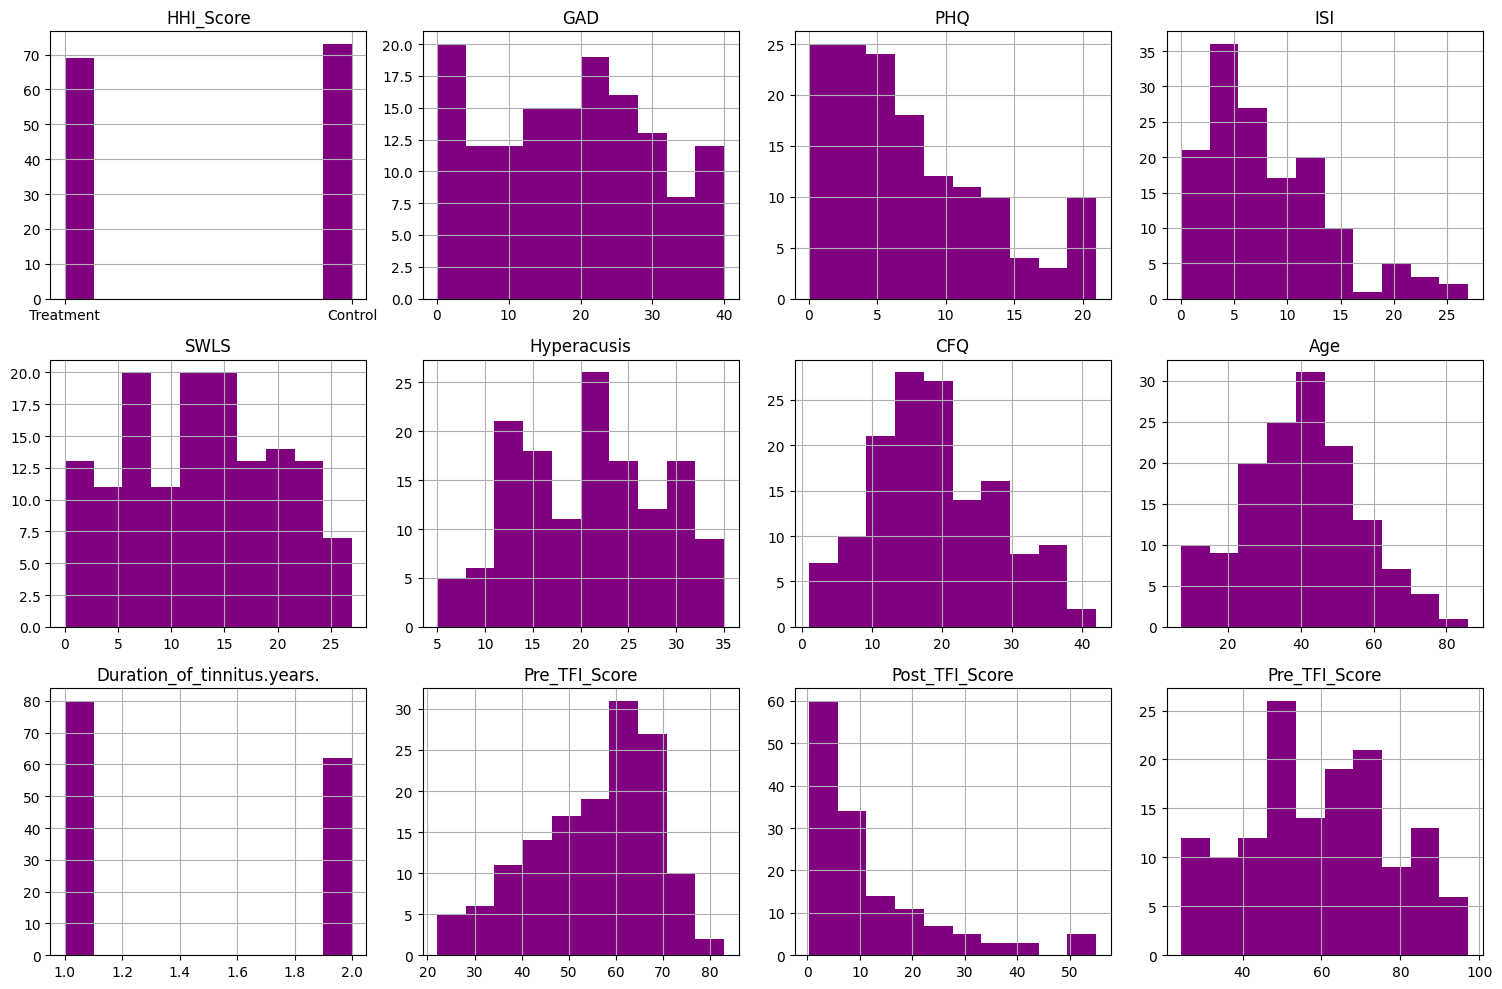

In [ ]:
figure, b = plt.subplots(3, 4)
figure.set_figwidth(15)
figure.set_figheight(10)

col = list(score.columns)
counter = 0

graph_names = [
    'HHI_Score', 'GAD', 'PHQ', 'ISI',
       'SWLS', 'Hyperacusis', 'CFQ','Age',
       'Duration_of_tinnitus.years.', 'Pre_TFI_Score', 'Post_TFI_Score'
]

for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        if counter < len(col):
            b[i, j].hist(score[col[counter]], color="purple")
            b[i, j].set_title(graph_names[counter] if counter < len(graph_names) else col[counter])
            b[i, j].grid(True)
            counter += 1
        else:
            b[i, j].axis('off')

plt.tight_layout()

<ipython-input-32-b988291766d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=score.corr()


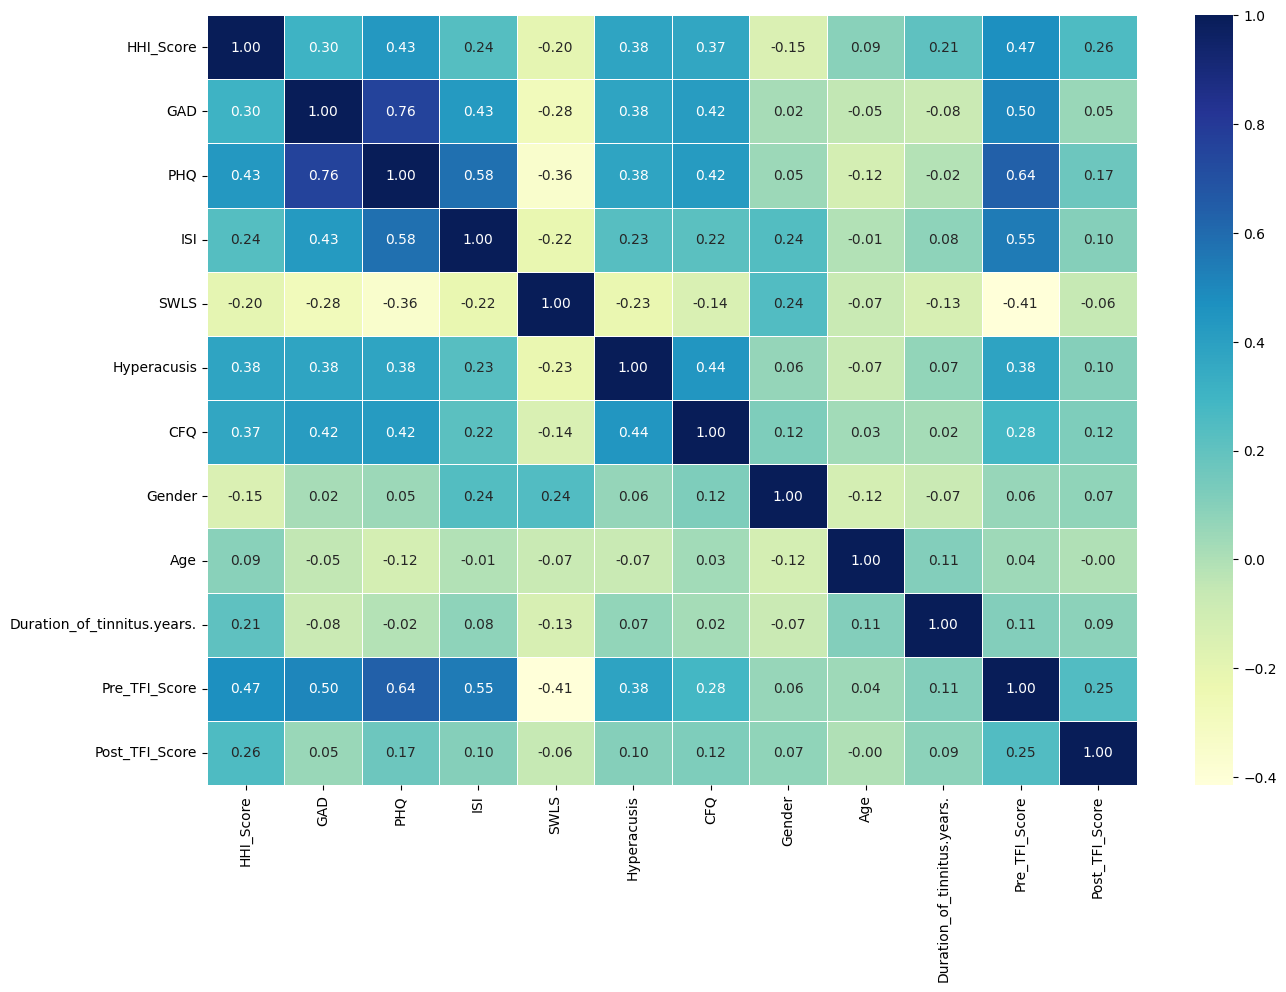

In [ ]:
corr_matrix=score.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix
               ,annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [ ]:
def pie_chart(a,labels):
  groups = score[a].value_counts()
  label = groups.index.tolist()
  values = groups.values.tolist()
  label=labels
  fig =plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  ax.pie(values, labels=label, autopct='%1.1f%%', startangle=140,colors=['indigo', 'beige'])
  ax.set_title(f'Pie Chart for the {a} Variable')

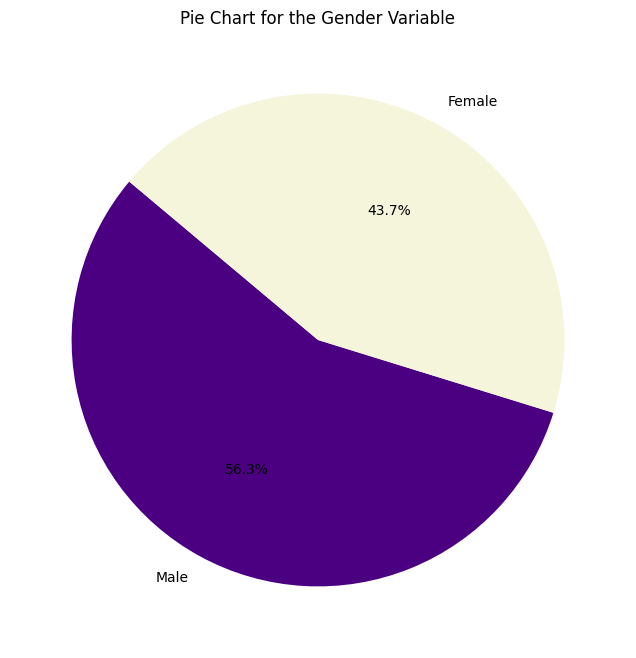

In [ ]:
pie_chart("Gender",["Male","Female"])

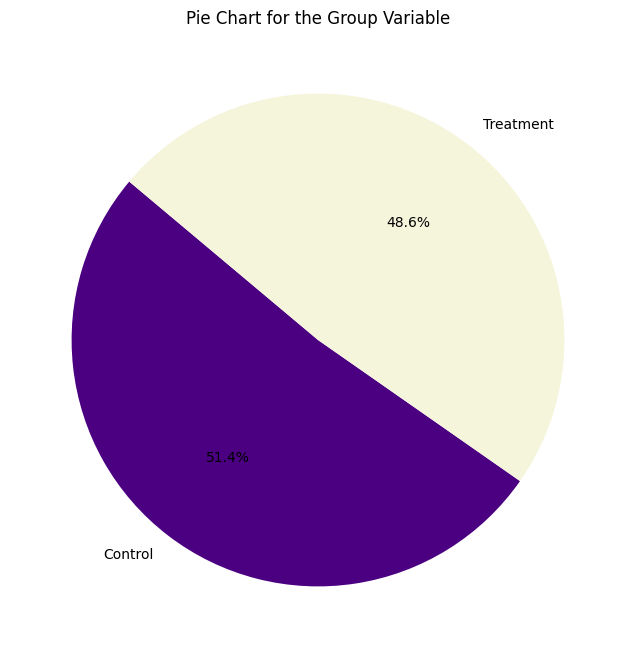

In [ ]:
pie_chart("Group",["Control","Treatment"])

In [ ]:
score.isna().sum()

Group                           0
HHI_Score                       0
GAD                             0
PHQ                             0
ISI                             0
SWLS                            0
Hyperacusis                     0
CFQ                             0
Gender                          0
Age                             0
Duration_of_tinnitus.years.     0
Pre_TFI_Score                   0
Post_TFI_Score                 17
dtype: int64

In [ ]:
df_copy = score.copy()
group_dummies = pd.get_dummies(df_copy['Group'], prefix='GroupTreatment', drop_first=True)
gender_dummies = pd.get_dummies(df_copy['Gender'], prefix='Gender', drop_first=True)
df_copy = pd.concat([df_copy, group_dummies, gender_dummies], axis=1)
df_copy.drop(columns=[ 'Group', 'Gender'], inplace=True)

In [ ]:
imputer = IterativeImputer(max_iter=5, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df_copy), columns=df_copy.columns)

In [ ]:
missing_values_after_imputation = df_imputed.isna().sum()

In [ ]:
df_imputed['TFI_Reduction'] = df_imputed['Pre_TFI_Score'] - df_imputed['Post_TFI_Score']

In [ ]:
X = df_imputed.drop(columns=['TFI_Reduction', 'Pre_TFI_Score', 'Post_TFI_Score'])
y = df_imputed['TFI_Reduction']

In [ ]:
df_imputed

,HHI_Score,GAD,PHQ,ISI,SWLS,Hyperacusis,CFQ,Age,Duration_of_tinnitus.years.,Pre_TFI_Score,Post_TFI_Score,GroupTreatment_Treatment,Gender_2,TFI_Reduction
0,0.0,11.0,8.0,15.0,15.0,14.0,34.0,48.0,5.0,69.6,16.000000,1.0,0.0,53.600000
1,10.0,6.0,2.0,2.0,30.0,14.0,25.0,56.0,20.0,32.8,45.335628,1.0,1.0,-12.535628
2,40.0,16.0,19.0,24.0,9.0,29.0,30.0,30.0,0.4,82.0,77.200000,1.0,0.0,4.800000
3,12.0,5.0,2.0,3.0,13.0,17.0,45.0,45.0,3.0,52.0,12.800000,1.0,0.0,39.200000
4,16.0,8.0,7.0,8.0,32.0,27.0,53.0,62.0,3.0,58.4,38.400000,1.0,1.0,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,28.0,10.0,16.0,6.0,23.0,20.0,50.0,24.0,0.4,78.4,71.200000,0.0,1.0,7.200000
138,28.0,6.0,3.0,2.0,20.0,17.0,65.0,68.0,3.0,53.2,82.500000,0.0,0.0,-29.300000
139,14.0,14.0,15.0,14.0,12.0,21.0,49.0,44.0,2.0,76.4,57.100000,0.0,1.0,19.300000
140,22.0,0.0,4.0,16.0,29.0,15.0,33.0,48.0,54.0,63.6,53.421554,0.0,1.0,10.178446


In [ ]:
df_imputed.isna().sum()

HHI_Score                      0
GAD                            0
PHQ                            0
ISI                            0
SWLS                           0
Hyperacusis                    0
CFQ                            0
Age                            0
Duration_of_tinnitus.years.    0
Pre_TFI_Score                  0
Post_TFI_Score                 0
GroupTreatment_Treatment       0
Gender_2                       0
TFI_Reduction                  0
dtype: int64

In [ ]:
df_imputed

,HHI_Score,GAD,PHQ,ISI,SWLS,Hyperacusis,CFQ,Age,Duration_of_tinnitus.years.,Pre_TFI_Score,Post_TFI_Score,GroupTreatment_Treatment,Gender_2,TFI_Reduction
0,0.0,11.0,8.0,15.0,15.0,14.0,34.0,48.0,5.0,69.6,16.000000,1.0,0.0,53.600000
1,10.0,6.0,2.0,2.0,30.0,14.0,25.0,56.0,20.0,32.8,45.335628,1.0,1.0,-12.535628
2,40.0,16.0,19.0,24.0,9.0,29.0,30.0,30.0,0.4,82.0,77.200000,1.0,0.0,4.800000
3,12.0,5.0,2.0,3.0,13.0,17.0,45.0,45.0,3.0,52.0,12.800000,1.0,0.0,39.200000
4,16.0,8.0,7.0,8.0,32.0,27.0,53.0,62.0,3.0,58.4,38.400000,1.0,1.0,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,28.0,10.0,16.0,6.0,23.0,20.0,50.0,24.0,0.4,78.4,71.200000,0.0,1.0,7.200000
138,28.0,6.0,3.0,2.0,20.0,17.0,65.0,68.0,3.0,53.2,82.500000,0.0,0.0,-29.300000
139,14.0,14.0,15.0,14.0,12.0,21.0,49.0,44.0,2.0,76.4,57.100000,0.0,1.0,19.300000
140,22.0,0.0,4.0,16.0,29.0,15.0,33.0,48.0,54.0,63.6,53.421554,0.0,1.0,10.178446


In [ ]:
seed = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
X_train = sm.add_constant(X_train)

In [ ]:
model_sm = sm.OLS(y_train, X_train).fit()

In [ ]:
summary = model_sm.summary()

In [ ]:
confidence_intervals = model_sm.conf_int()
print(summary)
print(confidence_intervals)

                            OLS Regression Results                            
Dep. Variable:          TFI_Reduction   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     7.909
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           9.15e-10
Time:                        04:27:11   Log-Likelihood:                -481.21
No. Observations:                 113   AIC:                             986.4
Df Residuals:                     101   BIC:                             1019.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:

lr = LinearRegression()

In [ ]:
sfs = SFS(lr,
          k_features='best',
          forward=True,
          floating=True,
          scoring='r2',
          cv=10)

In [ ]:
sfs = sfs.fit(X, y)

In [ ]:
selected_features = X.columns[list(sfs.k_feature_idx_)]
print('Selected features:', selected_features)

Selected features: Index(['GAD', 'ISI', 'SWLS', 'GroupTreatment_Treatment'], dtype='object')


In [ ]:
X_selected = X[selected_features]

In [ ]:
X_train_selected = X_train[selected_features]

In [ ]:
X_train_selected_sm = sm.add_constant(X_train_selected)

In [ ]:
model_selected_sm = sm.OLS(y_train, X_train_selected_sm).fit()

In [ ]:
summary_selected = model_selected_sm.summary()

In [ ]:
print(summary_selected)

                            OLS Regression Results                            
Dep. Variable:          TFI_Reduction   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     21.63
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           3.95e-13
Time:                        04:27:33   Log-Likelihood:                -483.06
No. Observations:                 113   AIC:                             976.1
Df Residuals:                     108   BIC:                             989.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
fitted_vals = model_selected_sm.predict()
resids = model_selected_sm.resid

1. Residuals vs. Fitted Values (to check for homoscedasticity and linearity)


In [ ]:
def scatter_plot(x_label,y_label,title,data):
  plt.figure(figsize=(6, 4))
  plt.scatter(fitted_vals, data,color='purple')
  plt.axhline(y=0, color='blue', linestyle='--')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

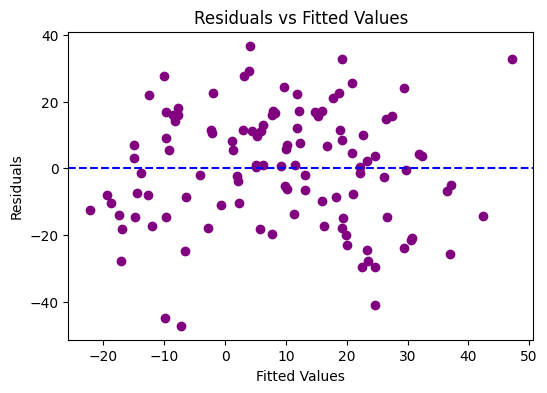

In [ ]:
scatter_plot("Fitted Values","Residuals","Residuals vs Fitted Values",resids)

2. Q-Q Plot (to check the normality of residuals)


<ipython-input-63-bf98b72d3b9f>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(norm_quantiles, intercept + slope * norm_quantiles, 'b', color='blue')


Text(0, 0.5, 'Ordered Values')

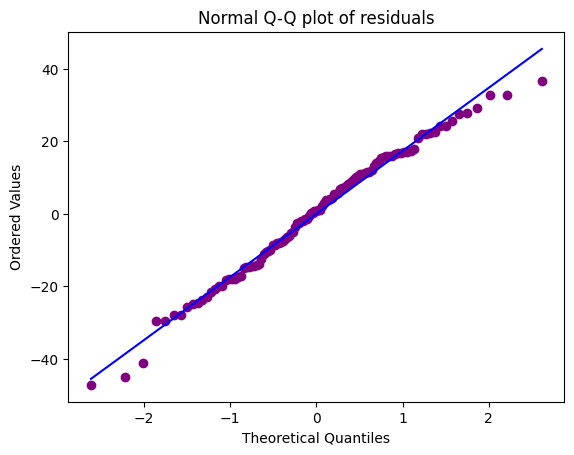

In [ ]:
resids_sorted = np.sort(resids)
norm_quantiles = stats.norm.ppf((np.arange(len(resids)) + 0.5) / len(resids))

plt.scatter(norm_quantiles, resids_sorted, color='purple')

slope, intercept = np.polyfit(norm_quantiles, resids_sorted, 1)
plt.plot(norm_quantiles, intercept + slope * norm_quantiles, 'b', color='blue')

plt.title('Normal Q-Q plot of residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

3. Scale-Location Plot (to check homoscedasticity)


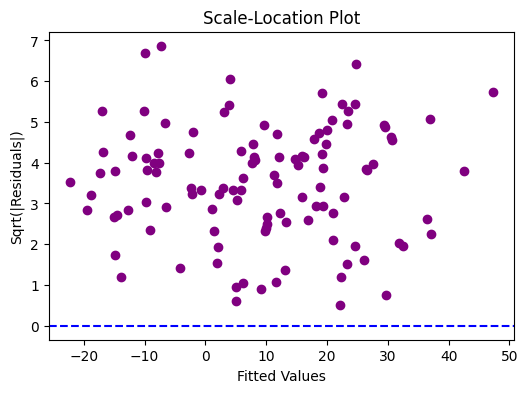

In [ ]:
scatter_plot("Fitted Values","Sqrt(|Residuals|)","Scale-Location Plot",np.sqrt(np.abs(resids)))

4. Leverage Plot (to identify influential cases)


Text(0.5, 1.0, 'Leverage vs. Normalized Residuals Squared')

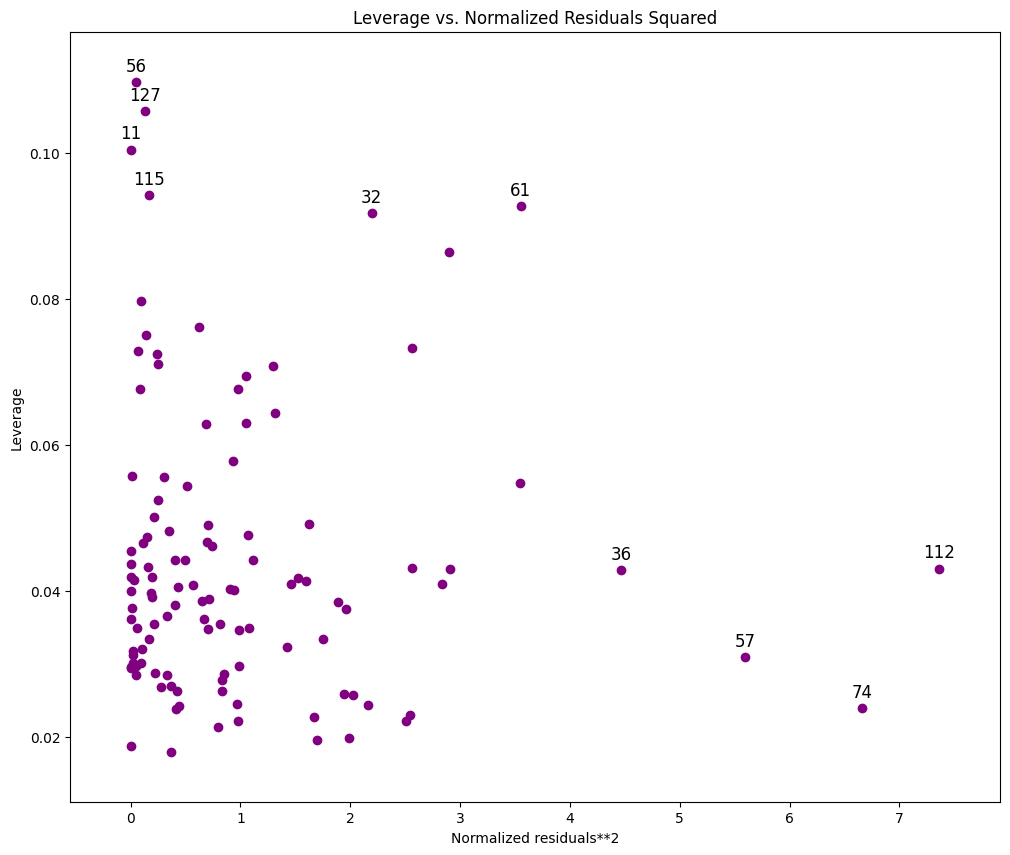

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
fig = plot_leverage_resid2(model_selected_sm, ax=ax,color='purple')
plt.title('Leverage vs. Normalized Residuals Squared')

Making a Prediction on the Test data set.

In [ ]:
X_test_selected = X_test[selected_features]
X_test_selected_sm = sm.add_constant(X_test_selected)

In [ ]:
y_pred = model_selected_sm.predict(X_test_selected_sm)
y_pred

132    -2.215889
100    10.173251
94    -11.895344
41     31.691659
3      14.175958
24     15.164644
48     29.499687
96    -15.189314
2      44.556184
5      30.599068
71     -3.592538
118     3.178801
85     -8.279909
23     49.332188
92      3.179699
55     29.754580
45     33.008840
12     13.984631
59     26.588954
86     -5.378898
128    -6.526230
97     -3.497772
117    22.203907
120    13.587638
113    -4.909719
122    -3.811236
25     25.649700
44     36.882683
135    -0.417190
dtype: float64

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 335.37534277618977
R-squared: 0.46625436775656537


K-Mean Regression

Question 10: Using K-mean Regression with Multiple K Values


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k_values = [2, 4, 6, 8, 10]
knn_models = {}
scores = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_models[k] = knn

    y_pred = knn.predict(X_test_scaled)
    scores[k] = mean_squared_error(y_test, y_pred)

print("KNN regression models have been fitted and evaluated for each specified K value.")

KNN regression models have been fitted and evaluated for each specified K value.


Question 11: Making Predictions on the Testing Dataset and Obtaining the Mean Square Error


MSE for K=2: 529.6434543472794
MSE for K=4: 303.8699150656897
MSE for K=6: 291.61357032835036
MSE for K=8: 298.38356829102383
MSE for K=10: 307.897741080885


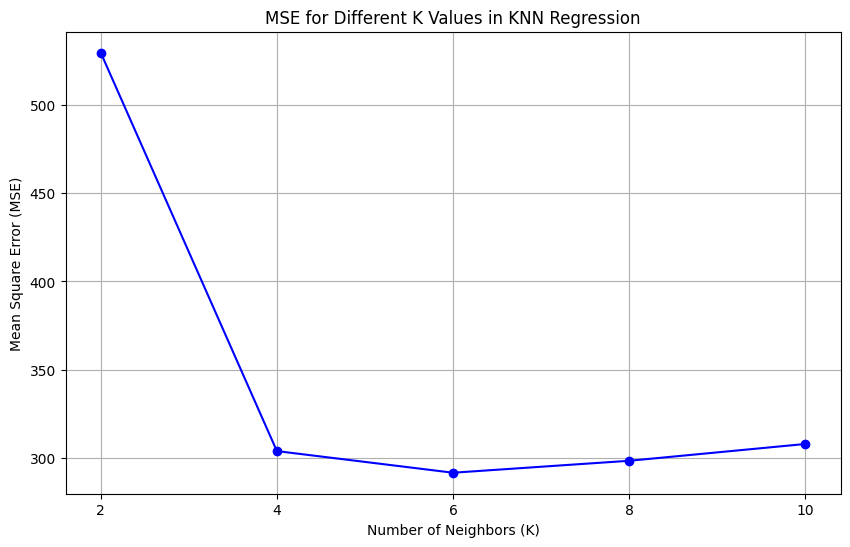

In [ ]:
mse_for_each_k = {}

for k in k_values:
    # Use KNeighborsRegressor for regression
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)

    # Predicting the target values for the test set
    predictions = knn_regressor.predict(X_test_scaled)

    # Calculating the mean squared error (MSE) for the predictions
    mse = mean_squared_error(y_test, predictions)
    mse_for_each_k[k] = mse
    print(f"MSE for K={k}: {mse}")

# Plotting the MSE for different values of K to find the best K
plt.figure(figsize=(10, 6))
plt.plot(list(mse_for_each_k.keys()), list(mse_for_each_k.values()), '-o', color='blue')
plt.title('MSE for Different K Values in KNN Regression')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Square Error (MSE)')
plt.xticks(list(mse_for_each_k.keys()))
plt.grid(True)
plt.show()

Question 12: Selecting the Optimal Number of Clusters Based on the Lowest Test MSE


In [ ]:
best_k = min(mse_for_each_k, key=mse_for_each_k.get)
best_mse = mse_for_each_k[best_k]

print(f"The best K is {best_k} with the lowest test MSE of: {best_mse}")


The best K is 6 with the lowest test MSE of: 291.61357032835036


Question 13:Comparison of Regression Models: Evaluating the Efficacy of Multiple Linear Regression vs. K-means Regression Based on Test MSE

In [ ]:
mse_linear_regression = 335.37534277618977

best_k = min(mse_for_each_k, key=mse_for_each_k.get)
best_mse_kNN = mse_for_each_k[best_k]

print(f"MSE from Multiple Linear Regression: {mse_linear_regression}")
print(f"Best MSE from K-NN Regression (K={best_k}): {best_mse_kNN}")

if mse_linear_regression < best_mse_kNN:
    print("Multiple Linear Regression yields a lower MSE and is the better model for the dataset.")
elif mse_linear_regression > best_mse_kNN:
    print("K-NN Regression yields a lower MSE and is the better model for the dataset.")
else:
    print("Both models result in the same MSE, indicating equal performance on the dataset.")


MSE from Multiple Linear Regression: 335.37534277618977
Best MSE from K-NN Regression (K=6): 291.61357032835036
K-NN Regression yields a lower MSE and is the better model for the dataset.


In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, L_train)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

kmeans_models = {}
regression_models = {}

k_values = [2, 4, 6, 8, 10]

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_scaled)
    kmeans_models[k] = kmeans

    train_labels = kmeans.predict(X_train_scaled)

    cluster_models = {}

    for cluster in range(k):
        cluster_indices = (train_labels == cluster)
        X_cluster = X_train_scaled[cluster_indices]
        y_cluster = y_train[cluster_indices]

        if X_cluster.shape[0] > 0:
            model = LinearRegression().fit(X_cluster, y_cluster)
            cluster_models[cluster] = model

    regression_models[k] = cluster_models

print("K-means clustering and regression models have been fitted for each specified K value.")


K-means clustering and regression models have been fitted for each specified K value.


MSE for K=2: 241.7642654853009
MSE for K=4: 538.5736562968028
MSE for K=6: 742.2474850679929
MSE for K=8: 1197.8744403397716
MSE for K=10: 2000.5020215065713


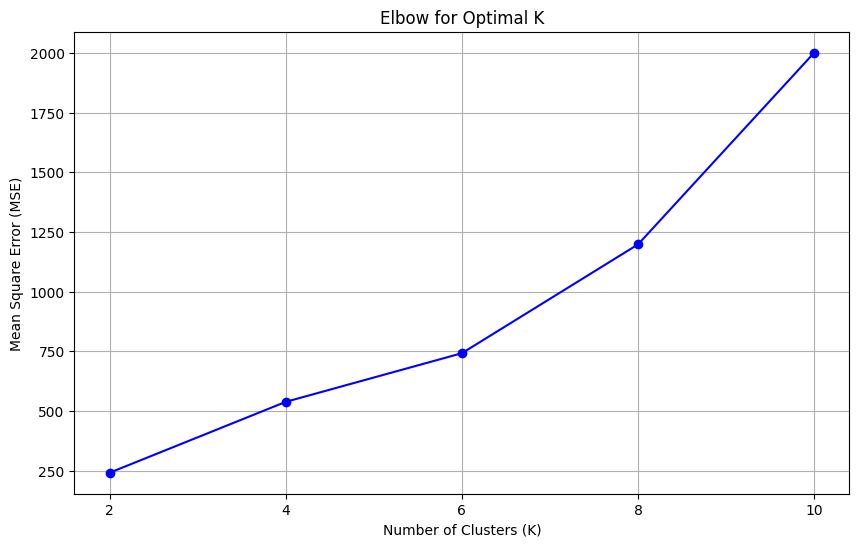

In [ ]:

mse_for_each_k = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_train_scaled)

    train_labels = kmeans.predict(X_train_scaled)
    test_labels = kmeans.predict(X_test_scaled)

    predictions = np.zeros(len(y_test))

    for cluster in range(k):
        cluster_indices_train = (train_labels == cluster)
        cluster_indices_test = (test_labels == cluster)

        if cluster_indices_train.sum() > 0:
            model = LinearRegression().fit(X_train_scaled[cluster_indices_train], y_train[cluster_indices_train])
            if cluster_indices_test.sum() > 0:
                predictions[cluster_indices_test] = model.predict(X_test_scaled[cluster_indices_test])

    mse = mean_squared_error(y_test, predictions)
    mse_for_each_k[k] = mse
    print(f"MSE for K={k}: {mse}")


plt.figure(figsize=(10, 6))
plt.plot(k_values, list(mse_for_each_k.values()), '-o', color='blue')
plt.title('Elbow for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Square Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

